# Cost (Loss) Functions
- [Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error)
- [Mean Absolute Error](https://en.wikipedia.org/wiki/Mean_absolute_error)
- [Root Mean Squared Error](https://en.wikipedia.org/wiki/Root-mean-square_deviation)
- [Residual Sum of Squares](https://en.wikipedia.org/wiki/Residual_sum_of_squares)
- [Precision, Recall, Accuracy](https://en.wikipedia.org/wiki/Precision_and_recall)
- [Confusion Matrix](https://en.wikipedia.org/wiki/Confusion_matrix)
- [Gradient Descent](https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html)

#### Some Videos
- [Loss Functions Explained](https://www.youtube.com/watch?v=IVVVjBSk9N0)
- [Loss Functions - EXPLAINED!](https://www.youtube.com/watch?v=QBbC3Cjsnjg)
- [Machine learning fundamentals (I): Cost functions and gradient descent](https://towardsdatascience.com/machine-learning-fundamentals-via-linear-regression-41a5d11f5220) (not a video)

#### Note: Supervised vs Unsupervised ML
> **Supervised learning**: Models that can predict labels based on labeled training data
> - Classification: Models that predict labels as two or more discrete categories
> - Regression: Models that predict continuous labels

> **Unsupervised learning**: Models that identify structure in unlabeled data
> - Clustering: Models that detect and identify distinct groups in the data
> - Dimensionality reduction: Models that detect and identify lower-dimensional structure in higher-dimensional data

> Source: [What is Machine Learning?](https://jakevdp.github.io/PythonDataScienceHandbook/05.01-what-is-machine-learning.html)
 though?

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

In [4]:
# labels = np.array([2,2,4])

preds = np.array([1,2,4])

sum(labels == preds)

2

In [6]:
# Load data and drop NaN values
df = pd.read_csv("./data/seattle_weather_1948-2017.csv").dropna()

In [9]:
df.head()

,DATE,PRCP,TMAX,TMIN,RAIN,preds,FP,TP,FN,TN
0,1948-01-01,0.47,51,42,True,False,0.0,0.0,1.0,0.0
1,1948-01-02,0.59,45,36,True,False,0.0,0.0,1.0,0.0
2,1948-01-03,0.42,45,35,True,True,0.0,1.0,0.0,0.0
3,1948-01-04,0.31,45,34,True,True,0.0,1.0,0.0,0.0
4,1948-01-05,0.17,45,32,True,True,0.0,1.0,0.0,0.0


In [11]:
100000 * .03

3600.0

In [ ]:
100000

120000

In [7]:
# Create function to perform our heuristic

def heuristic(df):
    
    """
    Simple heuristic:
    
    If it rained the past two days then predict rain else predict no rain
    
    Frist two rows are predicted false be default
    """
    
    preds = []
    for x in range(len(df)):
        # If first two rows then predict false
        if x <2:
            preds.append(False)
        else:
            # If either of last two days == True then predict true
            if (df.iloc[x-1]["RAIN"] == True) | (df.iloc[x-2]["RAIN"] == True):
                preds.append(True)
            else:
                # Predict false if the above is not true
                preds.append(False)
    return preds


def calc_confuse(df):
    
    "Calculate all possible results of a confusion matrix"

    # Hold all possible values and set to zero
    FP = np.zeros(len(df))
    TP = np.zeros(len(df))
    FN = np.zeros(len(df))
    TN = np.zeros(len(df))
    
    for x in range(len(df)):
        
        # True Positive
        if (df["RAIN"].iloc[x] == True) & (df["preds"].iloc[x] == True):
            TP[x] = 1
        # True Negative
        elif (df["RAIN"].iloc[x] == False) & (df["preds"].iloc[x] == False):
            TN[x] = 1
        # False Negative
        elif (df["RAIN"].iloc[x] == True) & (df["preds"].iloc[x] == False):
            FN[x] = 1
        # False Positive
        else:
            FP[x] = 1
    
    return FP, TP, FN, TN

In [8]:
df["preds"] = heuristic(df) # Create a column of predictions

confuse_ls = [w,x,y,z] = calc_confuse(df) # Calculate confusion matrix stats
col_names = ["FP", "TP", "FN", "TN"] # Create column name ls

# Create new columns
for x in range(len(confuse_ls)):
    df[col_names[x]] = confuse_ls[x]

# Look at 10 random rows to determin accuracy
df.sample(10)

,DATE,PRCP,TMAX,TMIN,RAIN,preds,FP,TP,FN,TN
19736,2002-01-13,0.00,42,34,False,True,1.0,0.0,0.0,0.0
22425,2009-05-25,0.00,69,47,False,False,0.0,0.0,0.0,1.0
16705,1993-09-26,0.00,76,49,False,False,0.0,0.0,0.0,1.0
5153,1962-02-09,0.28,54,42,True,True,0.0,1.0,0.0,0.0
14496,1987-09-09,0.00,75,49,False,False,0.0,0.0,0.0,1.0
14267,1987-01-23,0.17,47,38,True,False,0.0,0.0,1.0,0.0
15595,1990-09-12,0.00,66,55,False,False,0.0,0.0,0.0,1.0
9989,1975-05-08,0.00,70,42,False,False,0.0,0.0,0.0,1.0
13647,1985-05-13,0.13,55,44,True,False,0.0,0.0,1.0,0.0
4970,1961-08-10,0.00,89,55,False,False,0.0,0.0,0.0,1.0


In [13]:
df["PRCP"].describe()

count    25548.000000
mean         0.106222
std          0.239031
min          0.000000
25%          0.000000
50%          0.000000
75%          0.100000
max          5.020000
Name: PRCP, dtype: float64

In [15]:
pred_r = np.random.normal(
    loc = 0.106222, # mean
    scale = 0.239031, # standard deviation
    size = len(df)
)

In [16]:
pred_r

array([0.32589972, 0.36981143, 0.05021034, ..., 0.49960856, 0.30854223,
       0.14135632])

In [17]:
df["RAIN"].value_counts(normalize=True)

False    0.573352
True     0.426648
Name: RAIN, dtype: float64

In [18]:
df["PRCP"].mean()

0.10622162204477847

<AxesSubplot:ylabel='Frequency'>

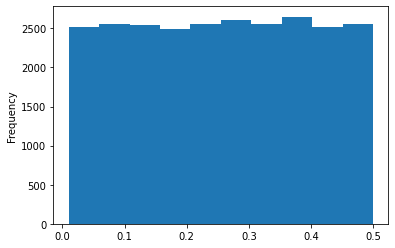

In [23]:
pd.Series(rng.uniform(0.01, 0.5, len(df))).plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

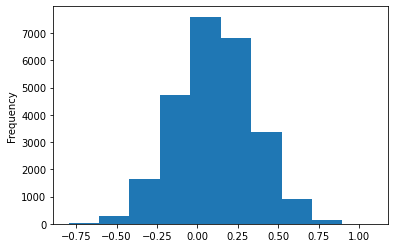

In [24]:
pd.Series(pred_r).plot(kind="hist")

In [25]:
# Crate random regression prediction to test regression cost functions

print(f"Regression Mean Baseline: {df['PRCP'].mean()}")

# Createing a random number generator
rng = np.random.default_rng(42)

# Assign random predictions to dataframe for demo purposes
df["preds_r"] = rng.uniform(0.01, 0.5, len(df))
df["preds_norm"] = pred_r

# Predict mean baseline
df["baseline"] = df["PRCP"].mean()

df.head()

Regression Mean Baseline: 0.10622162204477847


,DATE,PRCP,TMAX,TMIN,RAIN,preds,FP,TP,FN,TN,preds_r,preds_norm,baseline
0,1948-01-01,0.47,51,42,True,False,0.0,0.0,1.0,0.0,0.389238,0.325900,0.106222
1,1948-01-02,0.59,45,36,True,False,0.0,0.0,1.0,0.0,0.225050,0.369811,0.106222
2,1948-01-03,0.42,45,35,True,True,0.0,1.0,0.0,0.0,0.430713,0.050210,0.106222
3,1948-01-04,0.31,45,34,True,True,0.0,1.0,0.0,0.0,0.351710,-0.310719,0.106222
4,1948-01-05,0.17,45,32,True,True,0.0,1.0,0.0,0.0,0.056147,0.490879,0.106222


## Regression Cost Functions

---

#### Mean Error

- In this cost function, the error for each training data is calculated and then the mean value of all these errors is derived.
- Calculating the mean of the errors is the simplest and most intuitive way possible.
- The errors can be both negative and positive. So they can cancel each other out during summation giving zero mean error for the model.
- Thus this is not a recommended cost function but it does lay the foundation for other cost functions of regression models.

In [26]:
sum(df["PRCP"] - df["preds_r"])/len(df)

-0.14874469497166118

#### Mean Squared Error
[Reference](https://en.wikipedia.org/wiki/Mean_squared_error)

![](https://www.gstatic.com/education/formulas2/355397047/en/mean_squared_error.svg)

- Square of the difference between the actual and predicted value is calculated to avoid any possibility of negative error.
- It measures the average of the sum of squared differences between predictions and actual observations.
- Also known as L2 loss.
- In MSE, since each error is squared, it helps to penalize even small deviations in prediction when compared to MAE. But if our dataset has outliers that contribute to larger prediction errors, then squaring this error further will magnify the error many times more and also lead to higher MSE error.
- Less robust to outliers

In [32]:
df.head()

,DATE,PRCP,TMAX,TMIN,RAIN,preds,FP,TP,FN,TN,preds_r,preds_norm,baseline
0,1948-01-01,0.47,51,42,True,False,0.0,0.0,1.0,0.0,0.389238,0.325900,0.106222
1,1948-01-02,0.59,45,36,True,False,0.0,0.0,1.0,0.0,0.225050,0.369811,0.106222
2,1948-01-03,0.42,45,35,True,True,0.0,1.0,0.0,0.0,0.430713,0.050210,0.106222
3,1948-01-04,0.31,45,34,True,True,0.0,1.0,0.0,0.0,0.351710,-0.310719,0.106222
4,1948-01-05,0.17,45,32,True,True,0.0,1.0,0.0,0.0,0.056147,0.490879,0.106222


In [35]:
# Subtract predicted from the actual and square the error
df["error_sq"] = (df["PRCP"] - df["preds_r"])**2

# Do the same to our normall distributed predictions
df["error_sq_norm"] = (df["PRCP"] - df["preds_norm"])**2

# Square the error for uniform predictions
df["base_error_sq"] = (df["PRCP"] - df["baseline"])**2

df.head()

,DATE,PRCP,TMAX,TMIN,RAIN,preds,FP,TP,FN,TN,preds_r,preds_norm,baseline,error_sq,error_sq_norm,base_error_sq
0,1948-01-01,0.47,51,42,True,False,0.0,0.0,1.0,0.0,0.389238,0.325900,0.106222,0.006522,0.020765,0.132335
1,1948-01-02,0.59,45,36,True,False,0.0,0.0,1.0,0.0,0.225050,0.369811,0.106222,0.133188,0.048483,0.234042
2,1948-01-03,0.42,45,35,True,True,0.0,1.0,0.0,0.0,0.430713,0.050210,0.106222,0.000115,0.136744,0.098457
3,1948-01-04,0.31,45,34,True,True,0.0,1.0,0.0,0.0,0.351710,-0.310719,0.106222,0.001740,0.385292,0.041526
4,1948-01-05,0.17,45,32,True,True,0.0,1.0,0.0,0.0,0.056147,0.490879,0.106222,0.012963,0.102963,0.004068


In [44]:
# Calculate the MSE for baseline model

error_base_sum = df["base_error_sq"].sum() # Thanks Razan

# Does the same as above
# sum(df["base_error_sq"]) # THanks Zarah

error_base_sum/len(df)

0.057133801987473885

In [45]:
df["base_error_sq"].mean() # Thanks Mazen adn Raghad

0.057133801987473885

In [46]:
# Calculate MSE for our uniform predictions
# sum the errors
error_sum = sum(df["error_sq"])

# Divide error sum by length of the df
error_sum/len(df)

0.09948925253762744

In [47]:
# Calculate MSE for our normal predictions
# sum the errors
error_sum = sum(df["error_sq_norm"])

# Divide error sum by length of the df
error_sum/len(df)

0.11436582030897272

In [48]:
# Compare with Scikit Learn
# Close enough results seen as doing it by hand

reg_pred = mean_squared_error(df["PRCP"], df["preds_r"])
norm_pred = mean_squared_error(df["PRCP"], df["preds_norm"])
base_pred = mean_squared_error(df["PRCP"], df["baseline"])

print(f"MSE of baseline: {base_pred}\nMSE of uniform predictions: {reg_pred}\nMSE of normal predictions: {norm_pred}")

# Since our model is not better than baseline it is not useful
0.057133801987473885
0.09948925253762744
0.11436582030897272

MSE of baseline: 0.057133801987473885
MSE of uniform predictions: 0.09948925253762848
MSE of normal predictions: 0.11436582030897254


#### Mean Absolute Error
[Reference](https://en.wikipedia.org/wiki/Mean_absolute_error)

![](https://www.gstatic.com/education/formulas2/355397047/en/mean_absolute_error.svg)

- MAE addresses the shortcoming of mean error differently. Here an absolute difference between the actual and predicted value is calculated to avoid any possibility of negative error.
- MAE is measured as the average of the sum of absolute differences between predictions and actual observations.
- Also known as L1 Loss.
- It is robust to outliers thus it will give better results even when our dataset has noise or outliers.
- Give the same importance to all errors

#### Root Mean Squared Deviation
[Reference](https://en.wikipedia.org/wiki/Root-mean-square_deviation#:~:text=The%20root%2Dmean%2Dsquare%20deviation,estimator%20and%20the%20values%20observed.&text=RMSD%20is%20the%20square%20root%20of%20the%20average%20of%20squared%20errors.)

![](https://www.gstatic.com/education/formulas2/355397047/en/root_mean_square_deviation.svg)

- Defined as the square root of the average squared error.
- RMSE does not treat each error the same.
- Gives more importance to the most significant errors.
- One big error is enough to get a very bad RMSE.
- Sensitive to outliers.

#### Residual Sum of Squared Error
[Reference](https://en.wikipedia.org/wiki/Residual_sum_of_squares)

![](https://www.gstatic.com/education/formulas2/355397047/en/residual_sum_of_squares.svg)

- Measures the overall difference between your data and the values predicted by your estimation model (a “residual” is a measure of the distance from a data point to a regression line).
- Tells you how much of the dependent variable’s variation your model did not explain.
- It is the sum of the squared differences between the actual Y and the predicted Y
- The smaller the residual sum of squares, the better your model fits your data
- The greater the residual sum of squares, the poorer your model fits your data.
- One major use is in finding the coefficient of determination (R2). The coefficient of determination is a ratio of the explained sum of squares to the total sum of squares.

## Classification

precision 
- is the fraction of relevant instances among the retrieved instances
-(also called positive predictive value)

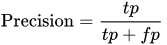

recall 
- is the fraction of relevant instances that were retrieved.
- (also known as sensitivity) 

Both precision and recall are therefore based on relevance.

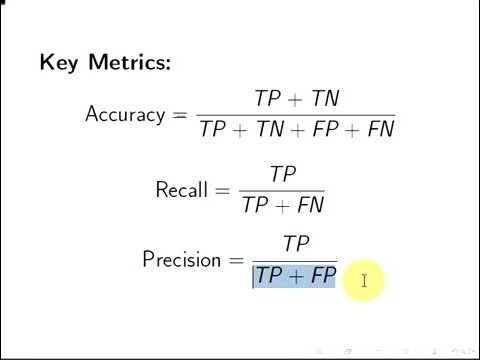

